Updated Weight and Bias Values:
Weights: [[1.79099116]]
Bias: [-2.28065832]


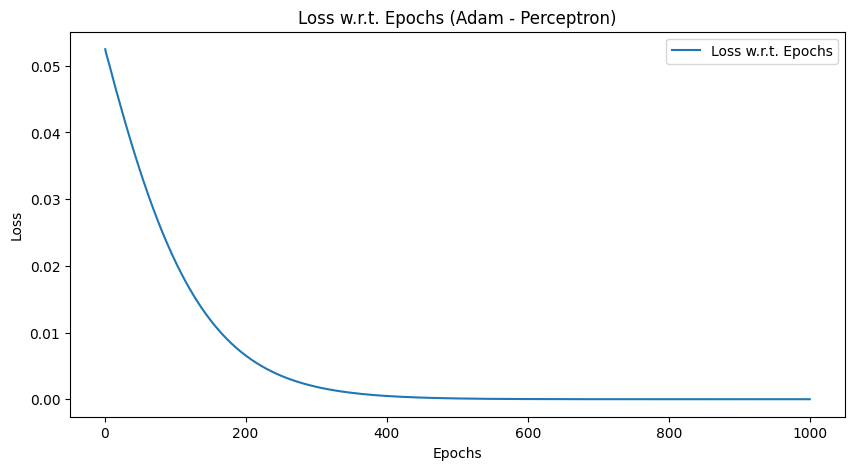

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(X, Y, weights, bias):
    predictions = sigmoid(np.dot(X, weights) + bias)
    loss = 0.5 * np.mean((Y - predictions)**2)
    return predictions, loss

def update_weights_adam(X, Y, learning_rate, beta1, beta2, epsilon, t, weights, bias, m_weights, v_weights, m_bias, v_bias):
    predictions, _ = compute_loss(X, Y, weights, bias)
    error = Y - predictions

    # Calculate gradients
    gradient_weights = -np.dot(X.T, error)
    gradient_bias = -np.sum(error)

    # Update moment estimates
    m_weights = beta1 * m_weights + (1 - beta1) * gradient_weights
    m_bias = beta1 * m_bias + (1 - beta1) * gradient_bias

    # Update squared moment estimates
    v_weights = beta2 * v_weights + (1 - beta2) * gradient_weights**2
    v_bias = beta2 * v_bias + (1 - beta2) * gradient_bias**2

    # Bias correction
    m_weights_hat = m_weights / (1 - beta1**t)
    m_bias_hat = m_bias / (1 - beta1**t)

    v_weights_hat = v_weights / (1 - beta2**t)
    v_bias_hat = v_bias / (1 - beta2**t)

    # Update weights using Adam optimizer
    weights -= (learning_rate / (np.sqrt(v_weights_hat) + epsilon)) * m_weights_hat
    bias -= (learning_rate / (np.sqrt(v_bias_hat) + epsilon)) * m_bias_hat

    return weights, bias, m_weights, v_weights, m_bias, v_bias

# Step a: Define initial data
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

# Step b: Initialize a perceptron with random weights
input_size = 1
output_size = 1

weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Adam optimizer parameters
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize moment estimates
m_weights = np.zeros_like(weights)
v_weights = np.zeros_like(weights)
m_bias = np.zeros_like(bias)
v_bias = np.zeros_like(bias)

# Step c: Adam Optimization
num_epochs = 1000

loss_history = []

for epoch in range(1, num_epochs + 1):
    # Calculate squared error loss and update weights using Adam optimizer
    predictions, loss = compute_loss(X, Y, weights, bias)
    weights, bias, m_weights, v_weights, m_bias, v_bias = update_weights_adam(
        X, Y, learning_rate, beta1, beta2, epsilon, epoch, weights, bias, m_weights, v_weights, m_bias, v_bias
    )

    loss_history.append(loss)

# Step iii: Display updated weight and bias values
print("Updated Weight and Bias Values:")
print("Weights:", weights)
print("Bias:", bias)

# Step iv: Plot loss w.r.t. epoch values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label='Loss w.r.t. Epochs')
plt.title('Loss w.r.t. Epochs (Adam - Perceptron)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
